I have my scraped data from the Wikipedia Current News portal and now want to clean it and do some exploratory data analysis on it.

# Outline

- cleaning
- exploratory data analysis

In [ ]:
! pip install cleantext
from cleantext import clean

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re

I scraped the webpages in batches, so I have several csv files which need to be combined

In [ ]:
def combine_files():
    dfs = []
    for file in os.listdir():
        if file.endswith('csv'):
            dfs.append(pd.read_csv(file).drop_duplicates())

    return pd.concat(dfs)

In [ ]:
headlines = combine_files()
headlines.head()

,day,month,year,subject,event,text
0,1,January,2003,NaN,NaN,Luíz Inácio Lula da SilvaLuíz Inácio Lula da ...
1,1,January,2003,NaN,NaN,"The Turkish-registered tanker Vicky, with 70,0..."
2,1,January,2003,NaN,NaN,A Royal Australian Air Force C-130 Hercules ov...
3,2,January,2003,NaN,NaN,"The first 49 of a promised 1,264 West African ..."
4,2,January,2003,NaN,NaN,French Foreign Minister Dominique de Villepin ...


In [ ]:
# headlines.to_csv('headlines.csv', index=False)

In [ ]:
# profile = ProfileReport(headlines, title='headlines')
# # profile.to_widgets()

In [ ]:
# headlines = pd.read_csv('2015and2016.csv')
# headlines.head()

## Cleaning

In [ ]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57406 entries, 0 to 925
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      57406 non-null  int64 
 1   month    57406 non-null  object
 2   year     57406 non-null  int64 
 3   subject  28018 non-null  object
 4   event    12976 non-null  object
 5   text     57404 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.1+ MB


Every row has a day, month, and year. Almost every row has text. And the subject and event columns are only sometimes present.

In [ ]:
headlines['subject'].nunique()

134

In [ ]:
def lower(x):
    try:
        return x.lower()
    except:
        return x

headlines['subject'] = headlines['subject'].apply(lower)
headlines['subject'].nunique()

123

In [ ]:
headlines['event'].nunique()

3402

In [ ]:
headlines['event'] = headlines['event'].apply(lower)
headlines['event'].nunique()

3369

In [ ]:
subject_map = {
    'armed': 'armed conflicts',
    'business': 'business',
    'art': 'art and culture',
    'disaster': 'disasters',
    'health': 'health',
    'law': 'law',
    'media': 'media',
    'politic': 'politics',
    'religio': 'religion',
    'science': 'science',
    'sport': 'sports'
}

In [ ]:
def map_subjects(x):
    if x == np.nan or x == '' or x == 'nan' or type(x) == float:
        return np.nan

    for key, value in subject_map.items():
        if re.match(re.compile(key), x):
            return value
    return x

In [ ]:
headlines['subject'] = headlines['subject'].map(map_subjects)
headlines['subject'].nunique()

72

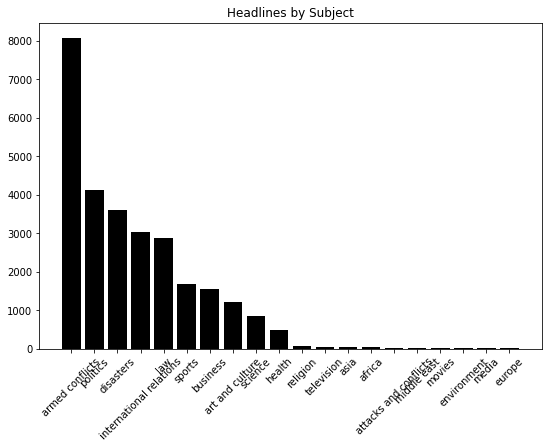

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
subject_counts = headlines['subject'].value_counts().head(20)
ax.bar(subject_counts.index, subject_counts.values, color='k')
plt.xticks(subject_counts.index, rotation=45)
plt.title('Headlines by Subject')
plt.show()

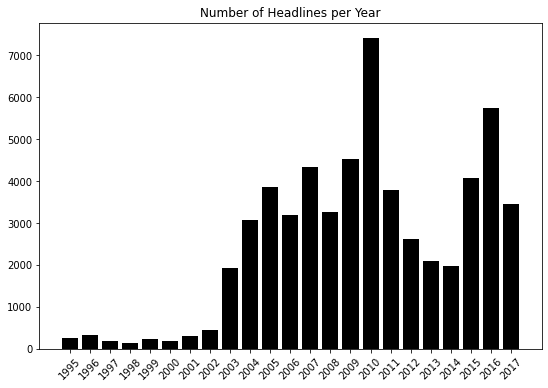

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
year_counts = headlines['year'].value_counts().sort_index()
ax.bar(year_counts.index, year_counts.values, color='k')
plt.xticks(year_counts.index, rotation=45)
plt.title('Number of Headlines per Year')
plt.show()

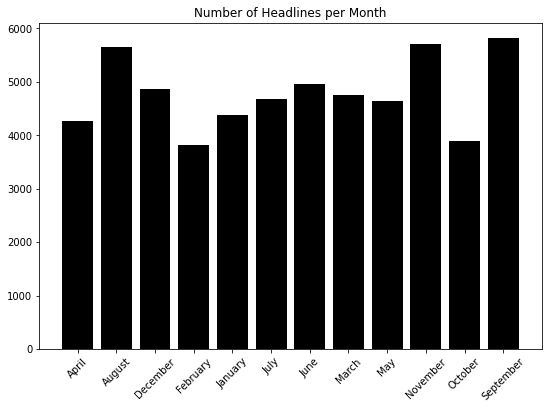

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
month_counts = headlines['month'].value_counts().sort_index()
ax.bar(month_counts.index, month_counts.values, color='k')
plt.xticks(month_counts.index, rotation=45)
plt.title('Number of Headlines per Month')
plt.show()

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
headline_counts = headlines.pivot_table(index='year',columns='month', values='day', aggfunc='count')[months]
headline_counts

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1995,22.0,30.0,29.0,19.0,27.0,19.0,12.0,13.0,8.0,16.0,53.0,13.0
1996,27.0,28.0,28.0,17.0,23.0,24.0,23.0,28.0,33.0,20.0,30.0,51.0
1997,8.0,13.0,17.0,16.0,18.0,18.0,20.0,23.0,18.0,14.0,8.0,16.0
1998,17.0,7.0,10.0,7.0,11.0,9.0,9.0,9.0,12.0,6.0,31.0,16.0
1999,20.0,19.0,20.0,16.0,29.0,17.0,22.0,14.0,8.0,17.0,20.0,24.0
2000,NaN,17.0,16.0,15.0,16.0,6.0,NaN,NaN,14.0,28.0,36.0,45.0
2001,146.0,14.0,9.0,8.0,4.0,8.0,21.0,8.0,43.0,20.0,16.0,8.0
2002,18.0,22.0,25.0,15.0,30.0,31.0,44.0,45.0,60.0,NaN,65.0,90.0
2003,88.0,103.0,134.0,118.0,113.0,88.0,111.0,178.0,169.0,187.0,365.0,276.0


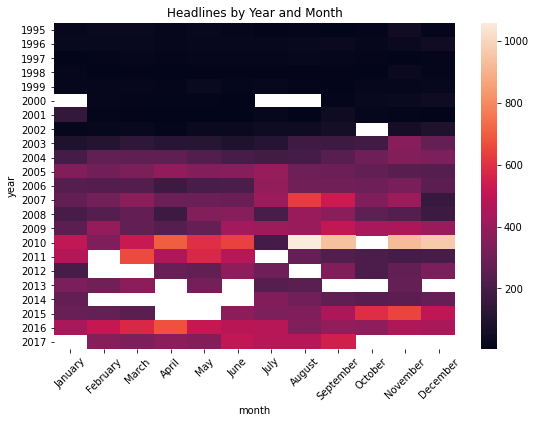

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(headline_counts)
plt.title('Headlines by Year and Month')
plt.xticks(rotation=45)
plt.show()

Now we can see what months and years the data is lacking. The 1990's have very few headlines ... However, the white rectangles in 2014 for instance mean that I could not scrape the current events for that month. The editors likely used a different HTML template than the 3 or so I accounted for.

In [ ]:
headlines.text[:5].values

array(['The death toll of the suicide bombing in Ibb, Yemen, that occurred on December 31 rises to 49 with the injury count rising to 70. (AFP via Business Standard)',
       'Terrorism in Yemen\nThe death toll of the suicide bombing in Ibb, Yemen, that occurred on December 31 rises to 49 with the injury count rising to 70. (AFP via Business Standard)',
       'Lithuania adopts the euro as its official currency, becoming the 19th member of the Eurozone. (CNN)',
       'The Palestine Authority signs a treaty to join and participate in the International Criminal Court. (Wall Street Journal)',
       'Vietnam’s new marriage law goes into effect, abolishing regulations that “prohibit marriage between people of the same sex.” (Bloomberg)'],
      dtype=object)

Most headlines have some media reference at the end, which is not relevant for text purposes, but we extract them searching for parenthesis using regular expressions and keep them to use later.

First, we must remove the rows with an empty text column.

In [ ]:
headlines = headlines.dropna(axis=0, subset=['text'])

In [ ]:
media_pattern = re.compile(r' \(.{0,100}\)\.?$')

def extract_media(text):
    matches = re.search(media_pattern, text)
    if matches:
        return matches.group(0).strip('()')

def remove_media(text):
    return re.sub(media_pattern, '', text)

In [ ]:
headlines['media'] = headlines['text'].apply(extract_media)
headlines['text'] = headlines['text'].apply(remove_media)

In [ ]:
headlines['media'].notna().value_counts()

True     49840
False     7564
Name: media, dtype: int64

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
headlines['textclean'] = headlines['text'].apply(clean)

In [ ]:
isdiff = headlines.apply(lambda row: row['text'] != row['textclean'], axis=1)
isdiff.sum()

982

In [ ]:
headlines[['text', 'textclean']].head().values

array([[' Luíz Inácio Lula da SilvaLuíz Inácio Lula da Silva ("Lula") becomes the 37th president of the Federative Republic of Brazil for the period (2003–2007).  Da Silva was elected representing the Worker\'s Party with 61% percent of the vote.  His inaugural speech includes vows to wipe out poverty, hunger, and corruption, but da Silva promised during the campaign to abide by an agreement with the International Monetary Fund to maintain a budget surplus of 3.75% and filled key economic posts with men considered friendly to foreign investment. Among guests at the inauguration were Venezuelan President Hugo Chávez, Cuban President Fidel Castro, and U.S. Trade Representative Robert Zoellick.',
        'Luíz Inácio Lula da SilvaLuíz Inácio Lula da Silva ("Lula") becomes the 37th president of the Federative Republic of Brazil for the period (2003–2007).  Da Silva was elected representing the Worker\'s Party with 61% percent of the vote.  His inaugural speech includes vows to wipe out pov

In [ ]:
headlines['text'] = headlines['textclean']
headlines = headlines.drop(['textclean'], axis=1)

In [ ]:
# headlines.to_csv('1995-2017clean.csv', index=False)

## Exploratory Data Analysis

In [ ]:
sporting_events = headlines.loc[(headlines.subject.isin(['sport', 'sports'])) & (headlines.event.notna()), 'event']
sporting_events.head()

12380                         2000 World Series
25478    Togo national football team bus attack
25479    Togo national football team bus attack
25480    Togo national football team bus attack
25481    Togo national football team bus attack
Name: event, dtype: object

In [ ]:
def trend_plot(keyword):
    matches = headlines[(headlines.text.str.contains(keyword)) | (headlines.event.str.contains(keyword))].drop('day', axis=1)
    counts = matches.groupby('year').text.count()
    counts.plot(kind='line', color='k')
    plt.ylim((-.5, counts.max()+.5))
    min, max = matches['year'].min(), matches['year'].max() + 1
    increment = 1 if max - min < 10 else 2
    plt.xticks(range(min, max, increment), rotation=45)
    plt.title(keyword.title() + ' Trend Plot')
    plt.xlabel('Year')
    plt.ylabel('Mentions')
                                        

In [ ]:
matches = headlines[(headlines.text.str.contains('Tom Brady')) | (headlines.event.str.contains('Tom Brady'))].drop('day', axis=1)
counts = matches.groupby(['year']).text.count()
counts.index

Int64Index([2007, 2015, 2016, 2017], dtype='int64', name='year')

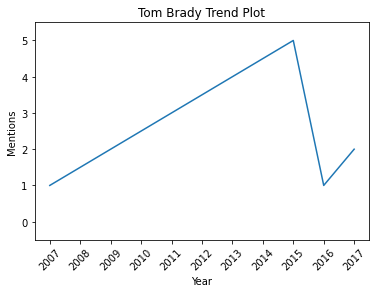

In [ ]:
trend_plot('Tom Brady')

In [ ]:
tom = headlines[headlines.text.str.contains('Tom Brady')]

In [ ]:
tom.media

95        (Sports Illustrated)
292     (Sports International)
1092          (New York Times)
1920               (AP) (ESPN)
1921               (AP) (ESPN)
7530                    (ESPN)
Name: media, dtype: object

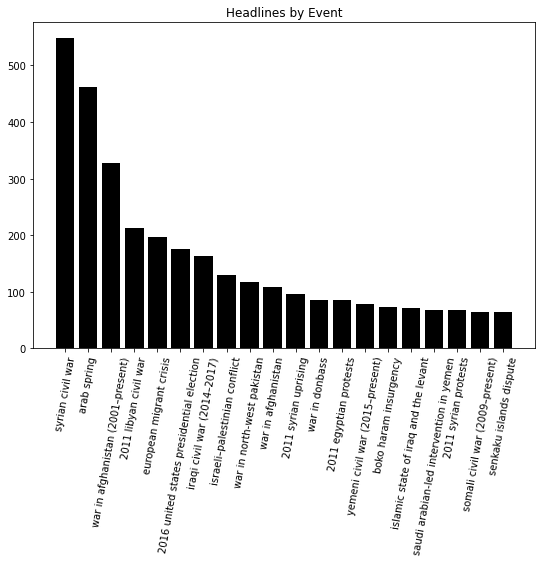

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
event_counts = headlines['event'].value_counts().head(20)
ax.bar(event_counts.index, subject_counts.values, color='k')
plt.xticks(event_counts.index, rotation=80)
plt.title('Headlines by Event')
plt.show()

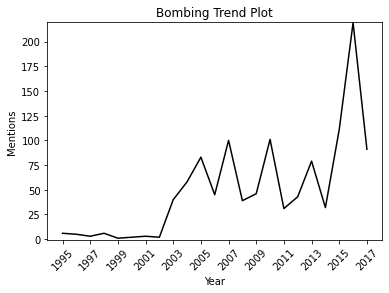

In [ ]:
trend_plot('bombing')

Now that the data is cleaned, we can move onto modelling and prediciting in the next part!